# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition. 

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013. 

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [573]:
# @title Download the data
# !wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
# !unzip -qq FullIJCNN2013.zip

from utility import download_and_unzip

download_and_unzip(
    filename="FullIJCNN2013.zip",
    url="https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip",
)


False

### Import Required packages

In [574]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV

# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import metrics

from PIL import Image
import os
from matplotlib import image as img
from numpy import asarray


### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [575]:
# to see the image using the PIL library

print("Pillow Version:", PIL.__version__)
traffic_sign = Image.open("FullIJCNN2013/00/00000.ppm")
print(traffic_sign.format)
print(traffic_sign.mode)
print(traffic_sign.size)
# show the image
# image.show()


Pillow Version: 11.1.0
PPM
RGB
(30, 30)


In [576]:
# resize image
traffic_sign_resized = traffic_sign.resize((30, 30))
print(traffic_sign_resized.mode)
print(traffic_sign_resized.size)


RGB
(30, 30)


(30, 30, 3)


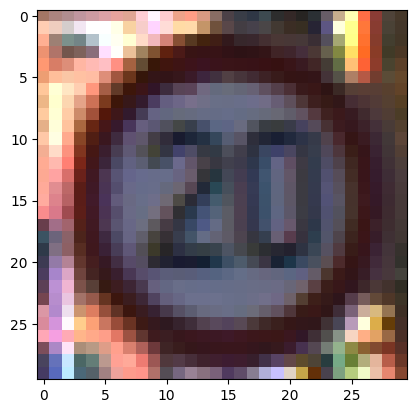

In [577]:
# converting the image to numpy array and then showing the image
traffic_sign_resized_array = asarray(traffic_sign_resized)
print(traffic_sign_resized_array.shape)
plt.imshow(traffic_sign_resized_array)


In [578]:
print(traffic_sign_resized_array)


[[[163 118 101]
  [172 132 127]
  [176 141 143]
  ...
  [138  60  53]
  [ 79  67  57]
  [ 70  56  42]]

 [[255 205 179]
  [239 205 191]
  [212 205 204]
  ...
  [136  60  49]
  [ 74  66  54]
  [ 68  55  42]]

 [[255 175 146]
  [157 128 116]
  [124 145 140]
  ...
  [133  60  44]
  [ 67  62  47]
  [ 67  54  39]]

 ...

 [[124  78  91]
  [172 136 198]
  [254 227 247]
  ...
  [130  74  48]
  [122  53  36]
  [ 87  48  39]]

 [[ 73  68  94]
  [101 114 186]
  [200 231 255]
  ...
  [228 181 156]
  [183  93  73]
  [106  55  40]]

 [[ 69  59  99]
  [ 88 106 189]
  [188 235 255]
  ...
  [235 192 168]
  [230 134 111]
  [133  71  49]]]


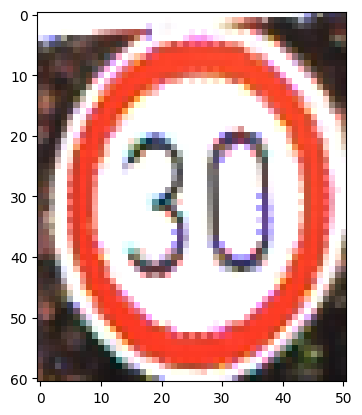

In [579]:
# to see the image using the matplotlib library

data = img.imread("FullIJCNN2013/01/00000.ppm")
plt.imshow(data)


In [580]:
data.shape, data.dtype


((61, 51, 3), dtype('uint8'))

In [581]:
# load the data as per the instructions above


def load_data():
    images = []
    labels = []
    for directory in glob.glob("FullIJCNN2013/*"):
        for file in glob.glob(directory + "/*.ppm"):
            img = Image.open(file)
            img_ = asarray(img.resize((30, 30)))
            images.append(img_.flatten())
            labels.append(int(directory.split("/")[-1]))
    return np.array(images), np.array(labels)


X_full, y_full = load_data()


In [582]:
X_full.shape, X_full.dtype, y_full.shape, y_full.dtype


((1213, 2700), dtype('uint8'), (1213,), dtype('int64'))

In [583]:
X_full[0], y_full[0]


(array([22, 21, 21, ..., 20, 18, 19], dtype=uint8), np.int64(3))

### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

43 ['FullIJCNN2013/00', 'FullIJCNN2013/01', 'FullIJCNN2013/02', 'FullIJCNN2013/03', 'FullIJCNN2013/04', 'FullIJCNN2013/05', 'FullIJCNN2013/06', 'FullIJCNN2013/07', 'FullIJCNN2013/08', 'FullIJCNN2013/09', 'FullIJCNN2013/10', 'FullIJCNN2013/11', 'FullIJCNN2013/12', 'FullIJCNN2013/13', 'FullIJCNN2013/14', 'FullIJCNN2013/15', 'FullIJCNN2013/16', 'FullIJCNN2013/17', 'FullIJCNN2013/18', 'FullIJCNN2013/19', 'FullIJCNN2013/20', 'FullIJCNN2013/21', 'FullIJCNN2013/22', 'FullIJCNN2013/23', 'FullIJCNN2013/24', 'FullIJCNN2013/25', 'FullIJCNN2013/26', 'FullIJCNN2013/27', 'FullIJCNN2013/28', 'FullIJCNN2013/29', 'FullIJCNN2013/30', 'FullIJCNN2013/31', 'FullIJCNN2013/32', 'FullIJCNN2013/33', 'FullIJCNN2013/34', 'FullIJCNN2013/35', 'FullIJCNN2013/36', 'FullIJCNN2013/37', 'FullIJCNN2013/38', 'FullIJCNN2013/39', 'FullIJCNN2013/40', 'FullIJCNN2013/41', 'FullIJCNN2013/42']


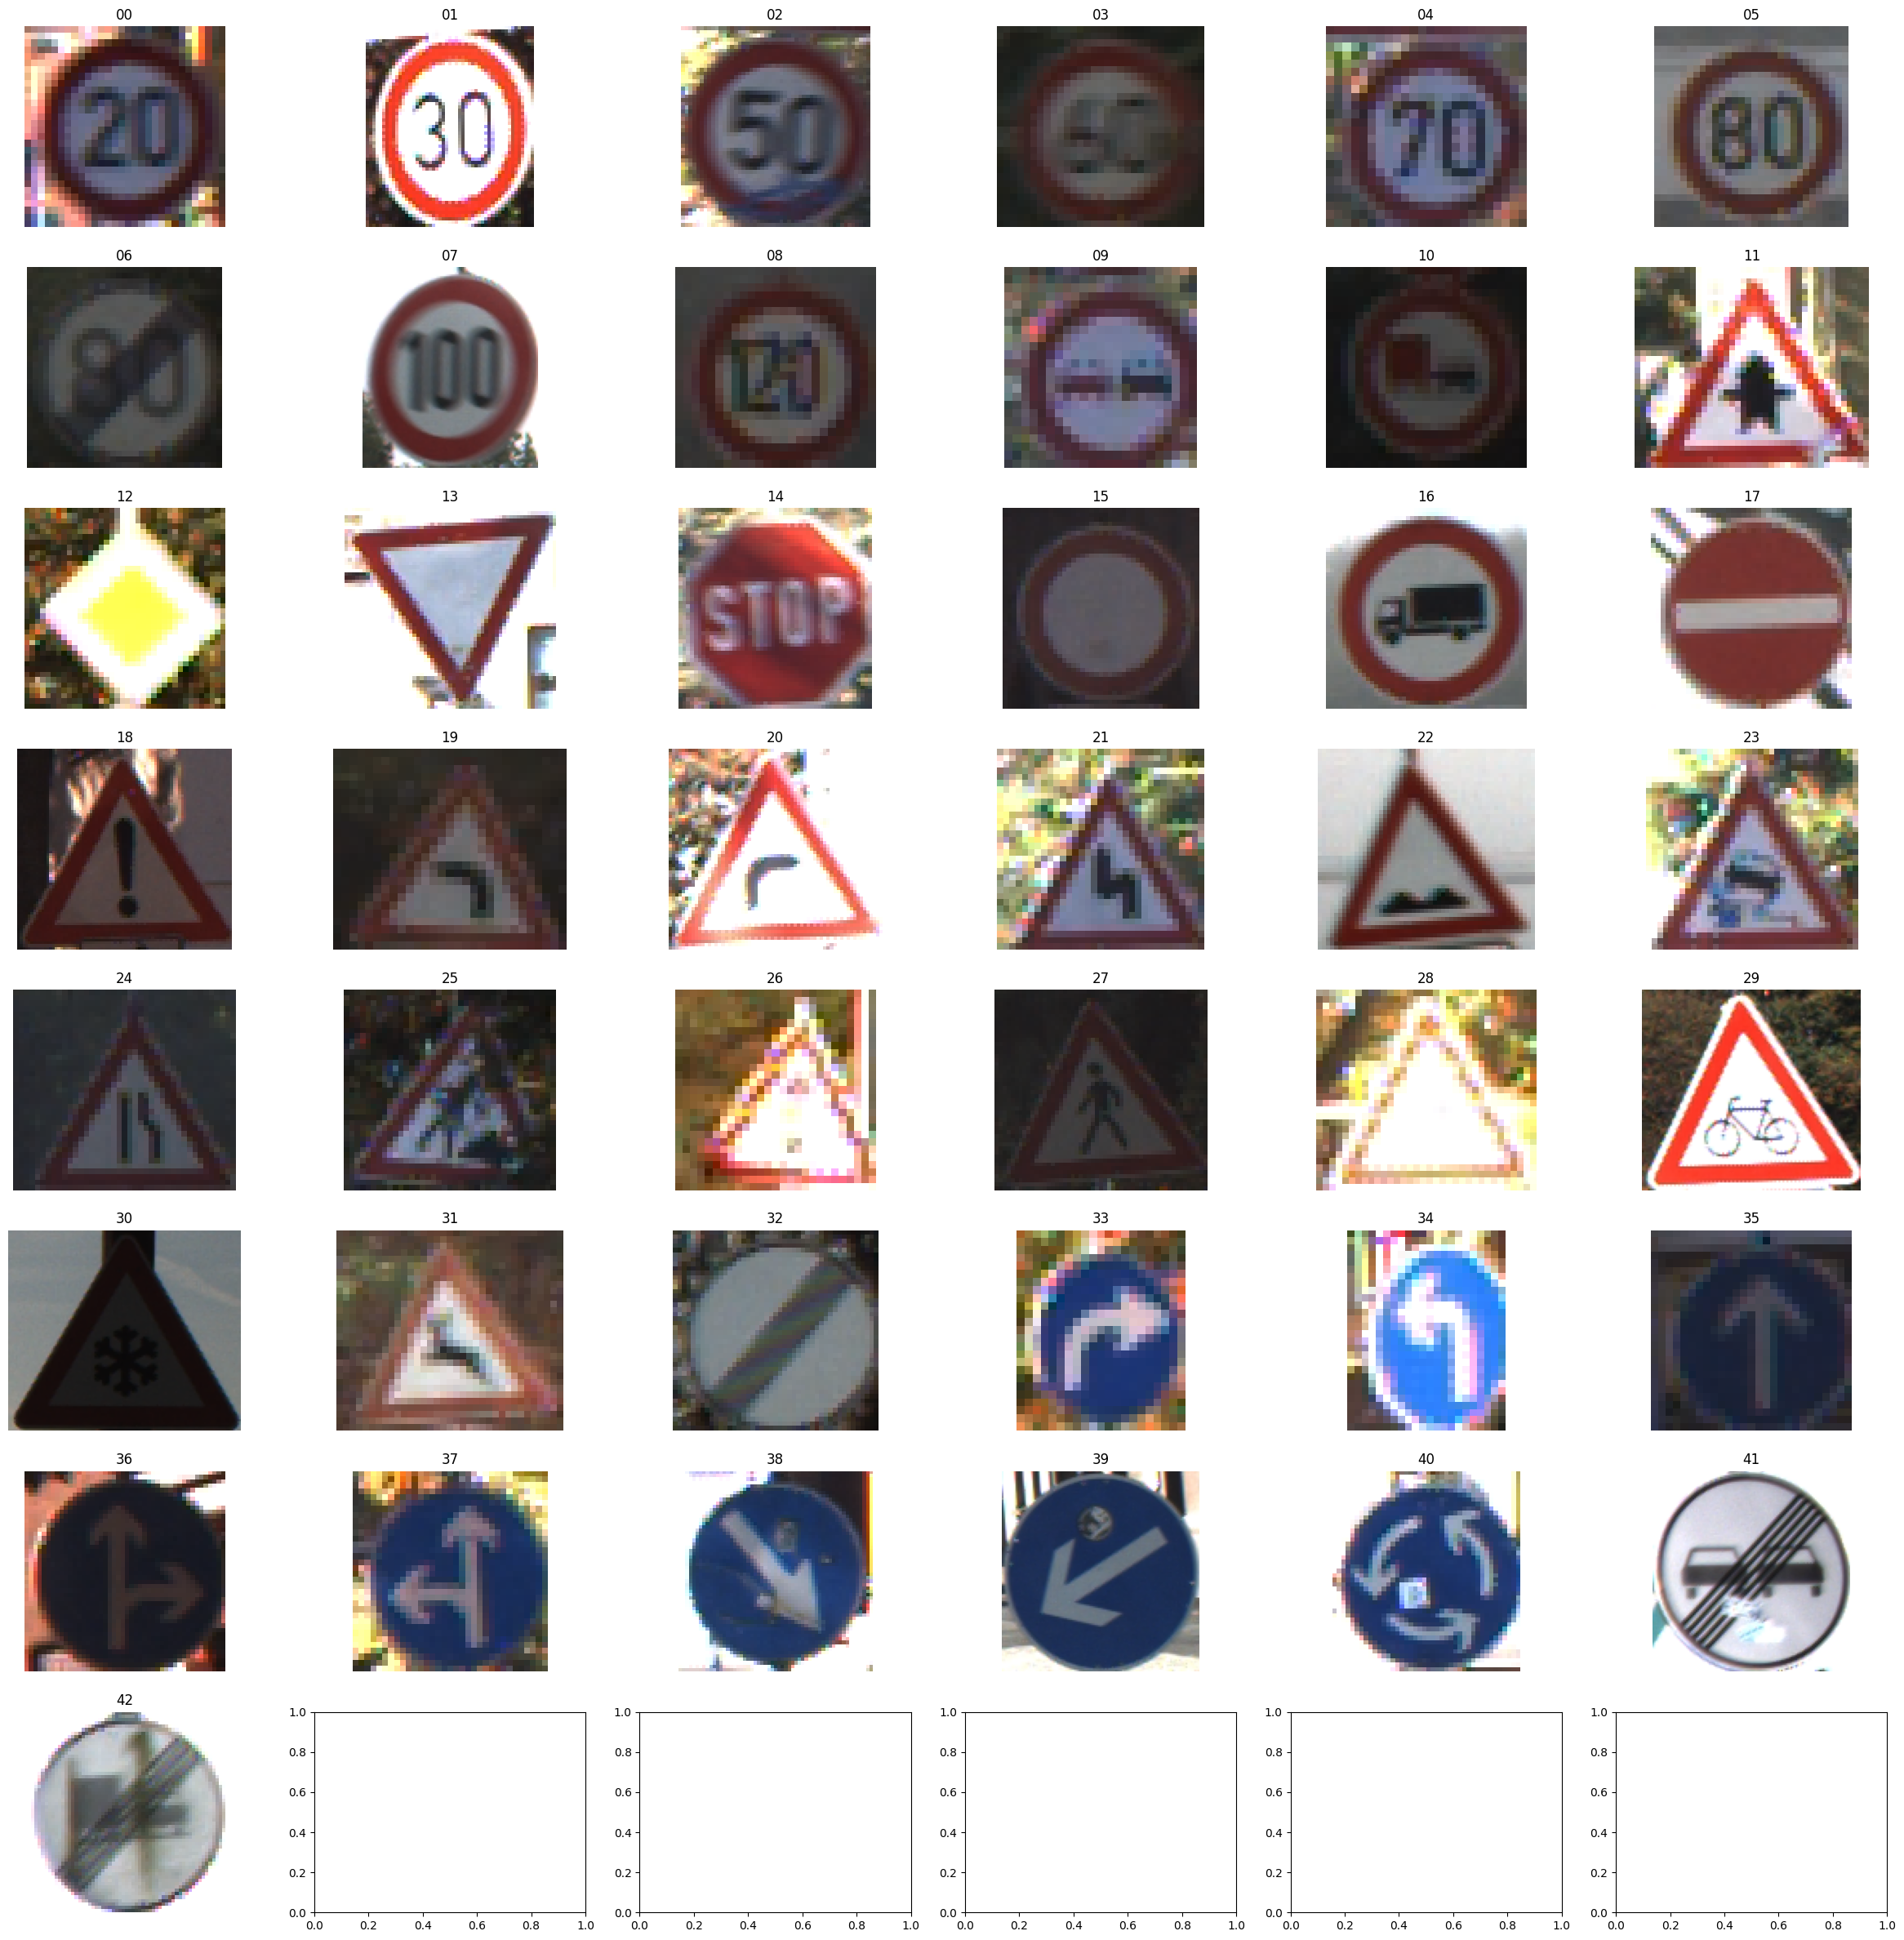

In [584]:
# YOUR CODE HERE
# get an array of subdirectories in the FullIJCNN2013 folder


subdirs = [x[0] for x in os.walk("FullIJCNN2013")]
subdirs = subdirs[1:]
subdirs = sorted(subdirs)
print(len(subdirs), subdirs)

# There are 42 traffic sign classes. All folder have image file in the ppm format starting with 00000.ppm
rows = 8
columns = 6
available_images = len(subdirs)

fig, ax = plt.subplots(rows, columns, figsize=(30, 30))
for i in range(rows):
    for j in range(columns):
        if (i * columns + j) >= available_images:
            break
        ax[i, j].imshow(img.imread(subdirs[i * columns + j] + "/00000.ppm"))
        ax[i, j].set_title(subdirs[i * columns + j].split("/")[-1])
        ax[i, j].axis("off")
plt.show()


#### Plot the distribution of Classes

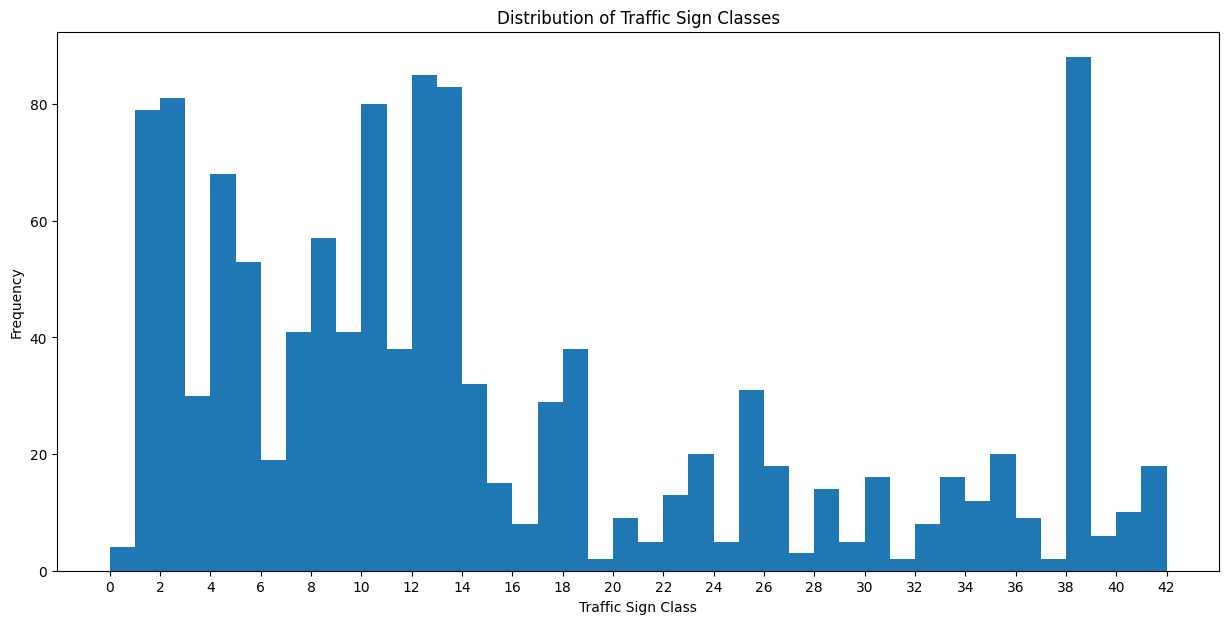

In [585]:
plt.figure(figsize=(15, 7))
plt.hist(y_full, bins=42)
plt.xlabel("Traffic Sign Class")
plt.ylabel("Frequency")
plt.title("Distribution of Traffic Sign Classes")
plt.xticks(np.arange(0, 43, 2))
plt.show()


#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [586]:
# normalize the pixel values of the images

X_full = X_full / 255.0


### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [587]:
# YOUR CODE HERE
# Split the data into train and test
# Train the MLP classifier with different parameters
# Get the accuracy score and performance metrics

X_dev, X_test, y_dev, y_test = train_test_split(
    X_full, y_full, test_size=250, random_state=42, stratify=y_full
)
X_train, X_val, y_train, y_val = train_test_split(
    X_dev, y_dev, test_size=250, random_state=42, stratify=y_dev
)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((713, 2700), (250, 2700), (250, 2700), (713,), (250,), (250,))

In [588]:
mlp_classifier = Sequential()
input_shape = (X_train.shape[1],)
mlp_classifier.add(Dense(1000, activation="relu", input_shape=input_shape))
mlp_classifier.add(Dense(200, activation="relu"))
# mlp_classifier.add(Dense(100, activation="relu"))
mlp_classifier.add(Dense(43, activation="softmax"))


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [589]:
mlp_classifier.summary()


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_92 (Dense)                │ (None, 1000)           │     2,701,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 200)            │       200,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 43)             │         8,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,909,843 (11.10 MB)

 Trainable params: 2,909,843 (11.10 MB)

 Non-trainable params: 0 (0.00 B)

In [590]:
mlp_classifier.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        # metrics.sparse_categorical_accuracy,
        # metrics.sparse_categorical_crossentropy,
    ],
    # metrics=["accuracy", metrics.sparse_categorical_accuracy],
)


In [591]:
history = mlp_classifier.fit(
    X_train, y_train, epochs=30, validation_data=(X_val, y_val)
)


Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0856 - loss: 4.0445 - val_accuracy: 0.1960 - val_loss: 3.2142
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2510 - loss: 3.1364 - val_accuracy: 0.3280 - val_loss: 2.8351
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3383 - loss: 2.6886 - val_accuracy: 0.4120 - val_loss: 2.5546
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4202 - loss: 2.4311 - val_accuracy: 0.4200 - val_loss: 2.4253
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5141 - loss: 2.1112 - val_accuracy: 0.4960 - val_loss: 2.1083
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5653 - loss: 1.8092 - val_accuracy: 0.4800 - val_loss: 1.9625
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5599 - loss: 1.7968 - val_accuracy: 0.5440 - val_loss: 1.8555
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6204 - loss: 1.5348 - val_accuracy: 0.5440 - val_loss

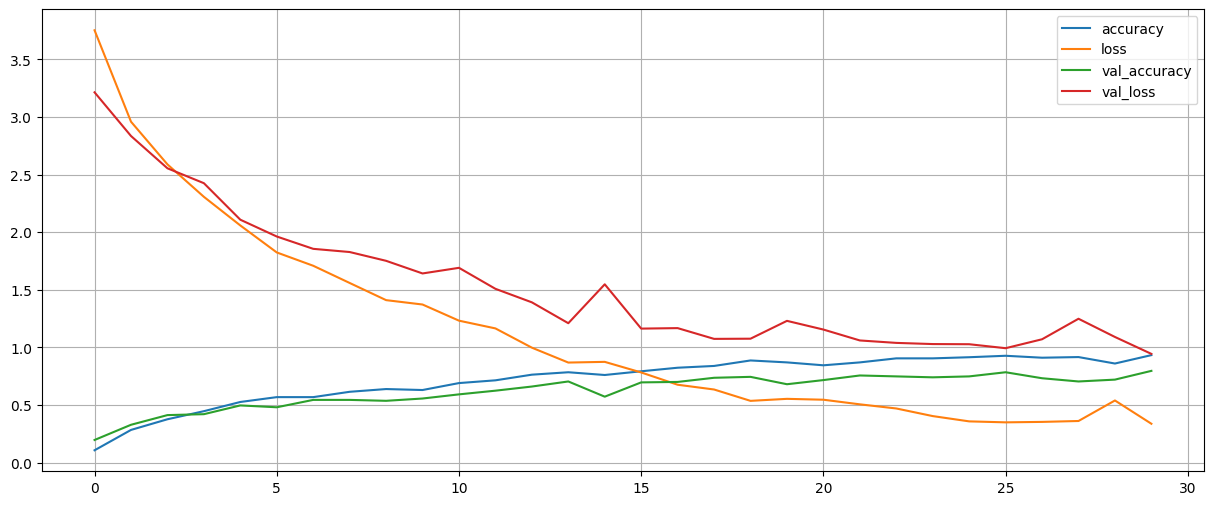

In [592]:
# Visualize training and validation metrics
df = pd.DataFrame(history.history)
df.plot(figsize=(15, 6))
plt.grid(True)
# set the vertical range to [0-1]
# plt.gca().set_ylim(0, 1)
plt.show()


### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
# YOUR CODE HERE


#### Try the different algorithms and compare the results with MLP classifier

In [ ]:
# YOUR CODE HERE


### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
print(tf.__version__)


In [ ]:
# Step 1 - Build the architecture
# YOUR CODE HERE


In [ ]:
# Step 2 - Compile the model
# YOUR CODE HERE


In [ ]:
# Step 3 - Fit and Evaluate the model
# YOUR CODE HERE


#### Try the same parameters used for MLP Classifier and build the keras model

In [ ]:
# YOUR CODE HERE


#### Experiment using Dropout, Regularization and Batch Normalization

In [ ]:
# YOUR CODE HERE


### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any. 
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.